# Cargamos las librerías iniciales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

%matplotlib inline

# Descripción de Columnas
Las columnas del dataset describen aspectos físicos del asteroide como también de su orbita con respecto a la Tierra. Todas las características de órbita son con respecto a la Tierra.

* Semi-Major Axis (a): Se refiere a la mitad del diametro más largo de la elipse
* Eccentricity (e): Se refiere a la cantidad en la que la orbita del asteroide se desvía de la forma de un círculo
* Inclination with respect to x-y ecliptic plane (deg): "Although all the planets and asteroids follow elliptical orbits around the Sun (obeying Kepler’s First Law), these orbits do not all lie in the same plane – they are usually tilted with respect to each other. As Earth-bound humans, we have adopted the plane in which the Earth moves around the Sun (the ecliptic) as our reference plane for the Solar System. With this convention, the Earth has an orbital inclination of zero degrees, and the orbital inclinations of other Solar System bodies are measured relative to this (for example, Mars has an orbital inclination of 1.85o, Mercury: 7.00o and Pluto: 17.15o)." Tomado de https://astronomy.swin.edu.au/cosmos/O/orbital+inclination. En nuestro caso sería una referencia relativa al asteroide.
* Longitude of the Ascending Node (om): "The point where the orbit passes through the reference plane in an “upward” direction is called the ascending node. Thus, the second orientation angle of the orbit is the angle between the ascending node and some reference direction in the reference plane, as seen from the Sun. In our solar system, the reference direction is usually taken to be the direction toward the vernal equinox. This angle is known as the longitude of the ascending node, Ω." Tomado de: https://www.sciencedirect.com/topics/physics-and-astronomy/longitude-of-the-ascending-node
* Argument of Perihelion (w): Es la distancia angular del ascending node hasta la el perhilion medido en el plano orbital.
* Periphelion Distance (q): Es la distancia de la orbita del asteroide en la cual se encuentra lo más cercano al sol.
* Aphelion Distance (ad): Es la distancia de la orbita del asteroide en la cual se encuentra lo más alejada del sol.
* Orbital Period in Years (per_y): Se refiere al tiempo en que se tarda el asteroide en completar su orbita alrededor de la Tierra en años.
* Data Arc-Span (data_arc): Sin descripción
* Orbit Condition Code (condition_code): Se refiere a un parámetro de incertidumbre sobre la órbita del asteroide
* Number of observation used (n_obs_used): Número de observaciones que se le hicieron al asteroide para establecer las demás características.
* Absolute Magnitude Parameter (H): Se refiere a la magnitud en la cual una estrella aparecería estar si se situara a 10 parsecs de un asteroide (1 parsec = 30 trillones de km aprox = 3 años luz)
* Near Earth Object (neo): Es un objeto celestial que pasa relativamente cerca a la órbita de la Tierra
* Physically Hazardous Asteroid (pha) VARIABLE OBJETIVO: Es un asteroide que hace trayectos cercanos a la órbita de la Tierra y tiene el tamaño suficiente como para poder causar daños severos en caso de impacto con nuestro planeta.
* Diameter of Asteroid in km (diameter): Diámetro del asteroide en kilómetros
* Object bi/tri axial ellipsoid dimensions km (extent): Sin descripción
* Geometric Albedo (albedo): "...the ratio of its total brightness at zero phase angle to that of an idealised fully reflecting, diffusively scattering (Lambertian) disk with the same cross-section." Tomado de https://space.fandom.com/wiki/Geometric_albedo
* Rotation Period in hours (rot_per): Tiempo en horas que le tarda al asteroide hacer una revolución en su propio eje.
* Standard Gravitational Parameter (GM): Producto de la masa y la constante gravitacional
* Color Index B-V magnitude difference (BV): Se refiere a una escala de medición de temperatura del cuerpo celestial. Números más pequeños indican que es caliente, mientras que números más grandes indican que es más caliente.
* Color Index U-B magnitude difference (UB): Se refiere a una escala de medición de temperatura del cuerpo celestial. Números más pequeños indican que es caliente, mientras que números más grandes indican que es más caliente.
* Color Index I-R magnitude difference (IR): Se refiere a una escala de medición de temperatura del cuerpo celestial. Números más pequeños indican que es caliente, mientras que números más grandes indican que es más caliente.
* Spectral Taxonomic type SMASSII (spec_B): Una clasificación dada al color que emite el asteroide
* Spectral Taxonomic type Tholen (spec_T): Una clasificación dada al color que emite el asteroide
* Magnitude Slope Parameter (G): No hay descripción
* Earth Minimum Orbit Intersection Distance au (moid): "The minimum orbital intersection distance (MOID) is used as a measure to assess potential close approaches and collision risks between astronomical objects" Tomado de https://www.aanda.org/articles/aa/full_html/2020/01/aa36502-19/aa36502-19.html
* Asteroid Orbit Class (class): MBA se refiere a Main Belt Asteroid, son asteroides que se encuentran en el anillo de asteroides que se encuentra entre Marte y Júpiter. OMB se refiere a Outer Main Belt Asteroid, son asteroides que se encuentran en el anillo de asteroides que se encuentran hasta Neptuno. Existen varias diferentes clasificaciones.
* Mean motion deg/d (n): No hay descripción
* Orbital Period d (per): Días que se tarda el asteroide en completar su orbita alrededor de la Tierra
* Mean Anomaly deg (ma): "The mean anomaly is the angle between lines drawn from the Sun to the perihelion B and to a point (not shown) moving in the orbit at a uniform rate corresponding to the period of revolution of the planet." Tomado de https://www.britannica.com/science/anomaly-astronomy#ref105659

In [64]:
df = pd.read_csv('Asteroid_Updated.csv')
df.head()

c:\users\hansr\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [79]:
df['class'].value_counts()

MBA    747420
OMB     24715
IMB     17552
MCA     17354
APO     11759
AMO      8020
TJN      7385
TNO      3310
ATE      1601
CEN       488
AST        84
IEO        20
HYA         4
PAA         2
Name: class, dtype: int64

In [3]:
df.shape

(839714, 31)

# Análisis de NA's
Podemos observar que existen varias columnas con NA's. No sería adecuado aplicar imputación ya que los NA's representan más del 50% de las observaciones. Si se aplicara imputación estaríamos cometiendo un error grave dado a que aunque utilizemos modelos de imputación, el algoritmo estaría prácticamente adivinando o teniendo predicciones poco precisas. La columna con mayor importancia como parte de las variables X es la de diámetro. Esto es porque la principal característica que vuelve a un asteroide letal para la Tierra es el tamaño. Obviamente hay que tomar en consideración su órbita y demás características, pero el diámetro es la más importante.

In [4]:
df.isnull().mean() * 100

name              97.383990
a                  0.000238
e                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
q                  0.000000
ad                 0.000715
per_y              0.000119
data_arc           1.842770
condition_code     0.103249
n_obs_used         0.000000
H                  0.320228
neo                0.000715
pha                1.958048
diameter          83.609181
extent            99.997856
albedo            83.755302
rot_per           97.761619
GM                99.998333
BV                99.878411
UB                99.883413
IR                99.999881
spec_B            99.801599
spec_T            99.883294
G                 99.985829
moid               1.958048
class              0.000000
n                  0.000238
per                0.000715
ma                 0.000953
dtype: float64

In [5]:
df2 = df[df['diameter'].notna()]

In [6]:
df3 = df2.loc[:, df2.isin([' ','NULL',0, np.nan]).mean() < .30]

In [7]:
df3.isnull().sum()

a                0
e                0
i                0
om               0
w                0
q                0
ad               0
per_y            0
data_arc       138
n_obs_used       0
H              747
neo              0
pha              0
diameter         0
albedo        1230
moid             0
class            0
n                0
per              0
ma               0
dtype: int64

In [9]:
df3.shape

(137636, 20)

# Distribución de los Datos

array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'e'}>,
        <AxesSubplot:title={'center':'i'}>,
        <AxesSubplot:title={'center':'om'}>],
       [<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'q'}>,
        <AxesSubplot:title={'center':'ad'}>,
        <AxesSubplot:title={'center':'per_y'}>],
       [<AxesSubplot:title={'center':'data_arc'}>,
        <AxesSubplot:title={'center':'n_obs_used'}>,
        <AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'albedo'}>],
       [<AxesSubplot:title={'center':'moid'}>,
        <AxesSubplot:title={'center':'n'}>,
        <AxesSubplot:title={'center':'per'}>,
        <AxesSubplot:title={'center':'ma'}>]], dtype=object)

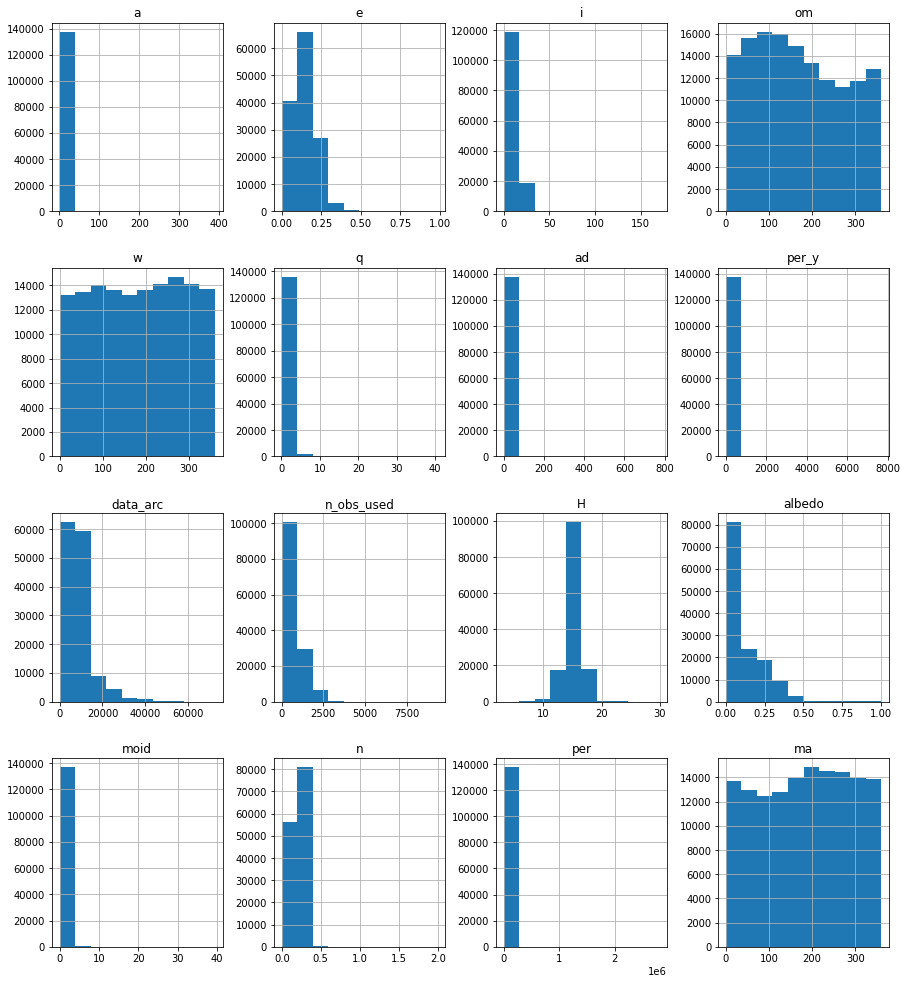

In [10]:
df3.hist(figsize=(15,17))

La mayoría de columnas tienen una distribución no normal, por lo que nos indica que será más adecuado normalizarlos que utilizar un Standard Scaler. (El standard scaler funciona mejor con datos con distribuciones normales). Además, las imputaciones que haremos para los NA's que todavían están presentes serán hechas por la media, ya que si utilizamos el promedio estaríamos afectando los datos por los outliers que están presentes en las columnas.

# Filtrado por Quantiles
Para poder asegurar lo más posible un buen set de datos, estaré filtrando por cuartiles la data. 

In [55]:
cols = ['a', 'e', 'i', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'albedo', 'moid', 'n', 'per']
Q1 = df.quantile(0.01)
Q3 = df.quantile(0.99)
IQR = Q3 - Q1
df4 = df3[~((df3[cols] < (Q1 - 1.5 * IQR)) |(df3[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df4.shape

(137439, 20)

El código de arriba elimina a todos los datos que se encuentren 1.5 veces afuera del intervalo intercuartil. Normalmente los cuartiles serían 25% y 75% pero lo más probable es que estaríamos descartando observaciones en las cuales 

# Nueva distribución de datos

array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'e'}>,
        <AxesSubplot:title={'center':'i'}>,
        <AxesSubplot:title={'center':'om'}>],
       [<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'q'}>,
        <AxesSubplot:title={'center':'ad'}>,
        <AxesSubplot:title={'center':'per_y'}>],
       [<AxesSubplot:title={'center':'data_arc'}>,
        <AxesSubplot:title={'center':'n_obs_used'}>,
        <AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'albedo'}>],
       [<AxesSubplot:title={'center':'moid'}>,
        <AxesSubplot:title={'center':'n'}>,
        <AxesSubplot:title={'center':'per'}>,
        <AxesSubplot:title={'center':'ma'}>]], dtype=object)

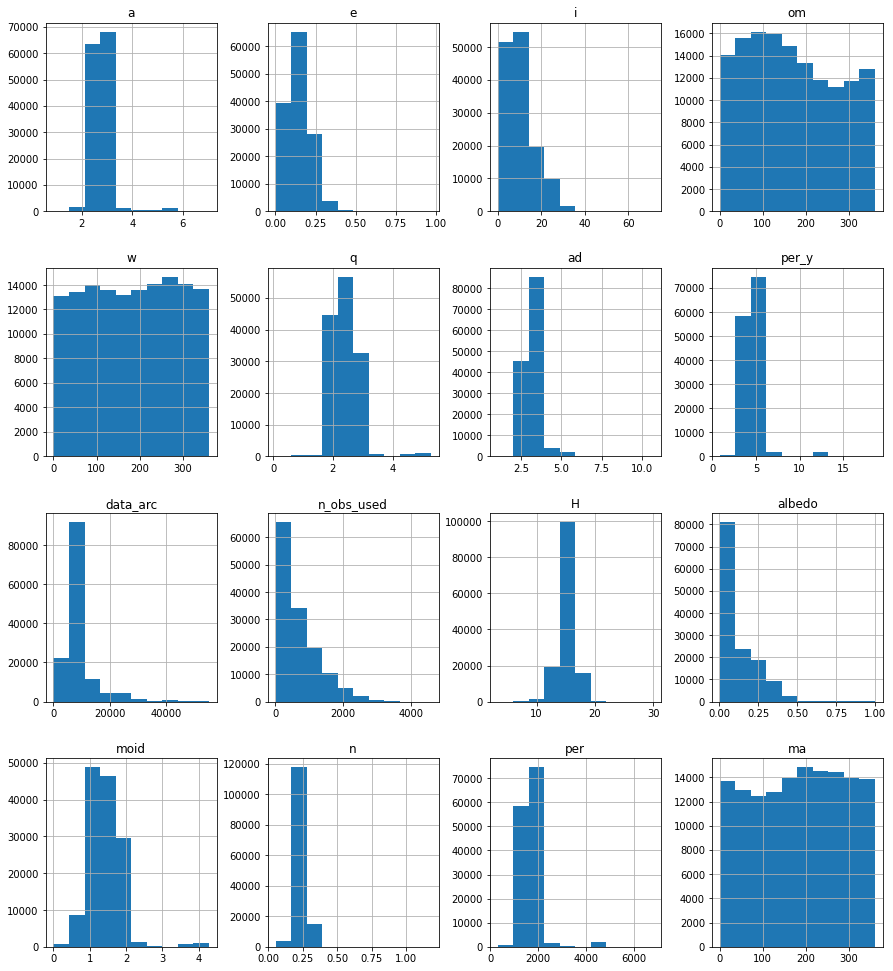

In [56]:
df4.hist(figsize=(15,17))

In [24]:
df4.isnull().sum()

a               0
e               0
i               0
om              0
w               0
q               0
ad              0
per_y           0
data_arc      119
n_obs_used      0
H             502
neo             0
pha             0
diameter        0
albedo        961
moid            0
class           0
n               0
per             0
ma              0
dtype: int64

In [28]:
df4.to_csv('asteroid_reduced.csv', index=False)

# Exportar archivo para reproducibilidad
Exportamos el archivo reducido para poder utilizarse más adelante en los análisis posteriores. Este lo podrá encontrar adjunto con el entregable sin necesidad de correr los códigos anteriores.

# Separación variables X y Y

In [68]:
y = df4['pha']
X = df4.drop('pha', axis=1)

## Codificar variable objetivo
Estableceremos los asteroides como physically hazardous con 1 y el resto como 0.

In [73]:
y.value_counts()

0    137239
1       200
Name: pha, dtype: int64

In [70]:
y=y.replace(to_replace="N",value=0)
y=y.replace(to_replace="Y",value="1")

# Pre procesamiento columnas X's

<AxesSubplot:>

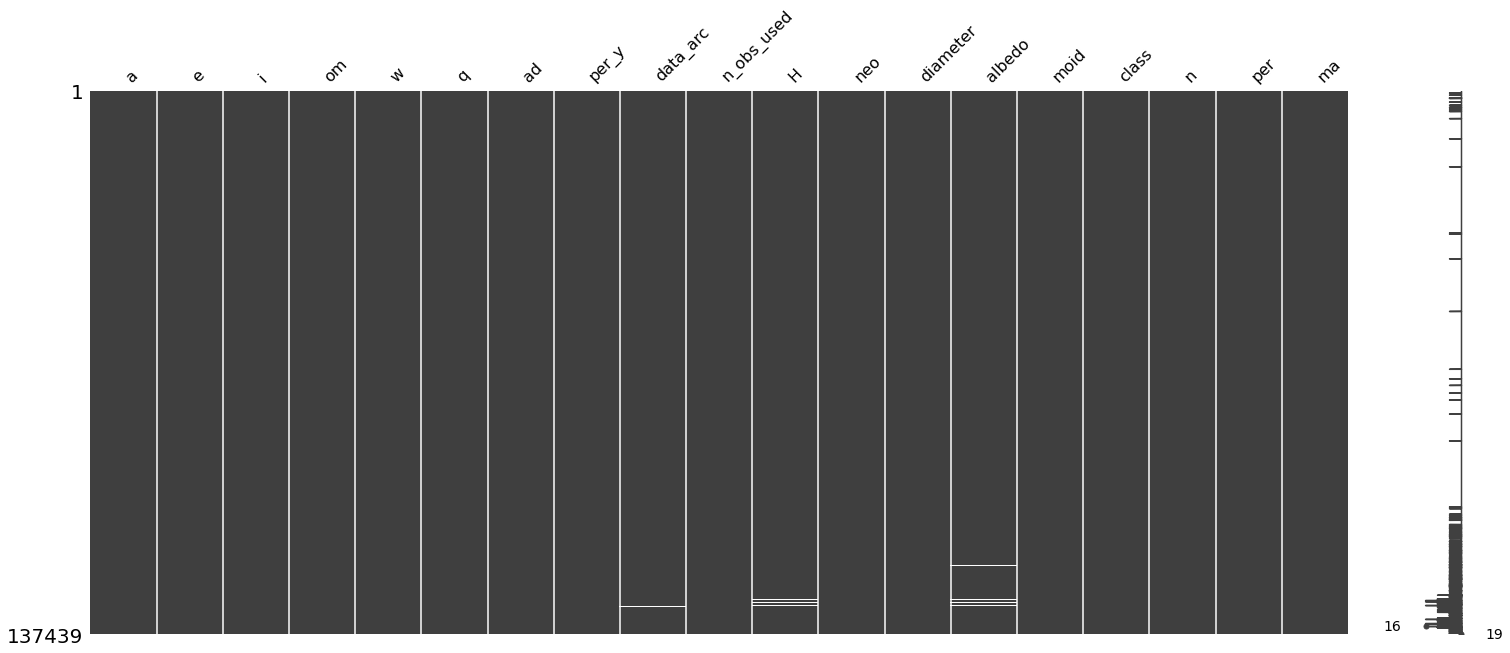

In [77]:
import missingno as msno
msno.matrix(X)

Podemos ver que la columna H (Absolute Magnitude Parameter) y Albedo tienen los NA's directamente relacionados. Será apropiado aplicar un KNN imputer ya que se considera datos MNAR (Missing Not At Random)

# Pipelines para preprocessing
Necesitamos transformar la data para poder entregar al modelo un set de datos que pueda procesar. Como mencionamos anteriormente, utilizaré un normalizer por la distribución no normal de los datos en las columnas.

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer

cat_pipeline = Pipeline([
        ('oh_enc', OneHotEncoder())
    ])

num_pipeline = Pipeline([
        ('knn_imputer', KNNImputer()),
        ('normalize_data', Normalizer())
    ])


In [83]:
num_col = X.select_dtypes(include='number').columns
cat_col = X.select_dtypes(exclude='number').columns

In [86]:
cat_col

Index(['neo', 'diameter', 'class'], dtype='object')

Diameter debe ser una columna númerica por lo que haremos el cambio de data type correspondiente. No está incluído el error que salió previo a la elaboración final del notebook pero ocurrió un error al tratar de convertir la columna a números ya que era de texto y en algunos campos tenían espacios. Por lo mismo, previo a convertirla númerica le quité todos los espacios en blanco de las observaciones para que la función logrará hacer la transformación.

In [88]:
X['diameter'] = X['diameter'].str.strip()
X["diameter"] = pd.to_numeric(X["diameter"], downcast="float")

In [93]:
cat_col = X.select_dtypes(exclude='number').columns
cat_col

Index(['neo', 'class'], dtype='object')

Ahora ya detecta las columnas correctas que son categóricas

In [95]:
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
        ("cat", cat_pipeline, cat_col),
        ("num", num_pipeline, num_col)
    ])

### Splitting Data
Separamos el dataset en 70% training y 30% testing, ponemos un random state para reproducibilidad y ponemos el parámetro shuffle como *True*  para que haga shuffle la data

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, shuffle=True)

In [96]:
X_train_processed = full_pipeline.fit_transform(X_train)
print(X_train_processed.shape)

(96207, 28)


In [97]:
X_test_processed = full_pipeline.fit_transform(X_test)
print(X_test_processed.shape)

(41232, 28)
